## Notebook 1: A Replication of the Treynor (1971) Dealer Model

### **Introduction: The Market Maker's Dilemma**
This notebook implements the ideas from Treynor's 1971 paper, where he discusses market makers, how they lose against informed traders, and how the public has to pay the price for the special information that some traders carry.

These specially informed traders cause huge losses to market makers. Market makers are liquidity providers, and in most trades, they provide enough liquidity so that the market can function efficiently.

When an informed trader enters the market, it is often via a market order hitting the bid or ask set by the market maker, or a limit order precise enough to directly match the quotes placed by the market maker. As they are informed, they accurately get into the right position and wait for their expected event to take place. In this process, market makers, unfortunately, end up on the wrong side. As informed traders win, market makers lose.

### **An Analogy: The Used Car Dealer**
Let's consider a real-life analogy. Imagine you are a car dealer with a simple business model: buy cars at a fair price and sell them to another person at a price slightly above fair value, leaving enough margin for your profit.

Let's say you, as the dealer, see a car and estimate a fair price of `$10,250`. You offer `$10,000` and get the deal done. You then see an opportunity and sell it slightly above the fair price at `$10,500`. You have made a profit of `$500`. However, you needed two people to complete this: one from whom you bought and another to whom you sold.

Treynor's 1971 paper simplifies this. It says if you were able to acquire the car below its fair value, you made a profit. That profit is the difference between the fair value and the acquiring cost, which here is `$250`. This profit of `$250` is half of the total spread (`$500`), and that is the logic we will implement.

Now, let's introduce **asymmetric information**. Let's say when you buy that car, the seller is a *"sneaky mechanic"* who knows the car has a fault in the engine and will not survive much longer. He also knows the car is only worth `$5,000`. He comes to sell it to you, you check the car, find it working, and think it is a good deal. You offer `$10,000` and the deal is done. According to Treynor's simple logic, you may feel you made `+$250`, but in reality, you will lose the game. To compensate for these types of losses, you must charge a premium to all your customers to protect yourself from these sneaky people, who represent a fraction of your total customers. This premium is included in your spread so that you, as a market maker, don't lose money.

### **The Simplified Model: Assumptions and Logic**
As soon as we acquire an asset below its fair price, we assume a profit of `spread/2`. As soon as we sell it at the ask (above fair), we also assume a profit of `spread/2`.

If the fair price is `x`, the ask is `x + spread/2` and the bid is `x - spread/2`. Treynor used this simple framework to make the concepts less complex. The idea is simple: if something has a fair value of `x` and you can acquire it for less, that is considered a direct profit on paper.

The problem with this is that Treynor doesn't consider the real-world scenario where a profit is only realized after you offload the asset. In dynamic financial markets, the fair price is susceptible to change based on who you trade with (informed vs. uninformed traders). Treynor completely ignores this complexity to establish the initial logic of how to approach the idea that informed traders will always win against market makers, and how to mitigate those losses.

So, what is the logic to protect against losses from these informed traders?

### **The Mathematical Formulation**
The approach is simple logic based on the Treynor model (1971). We use math to calculate the expected losses from informed traders. We use the probability that a random trader is informed. Let's say that probability is `p`, so `1-p` is the probability that the trader is uninformed.

Using a frequentist approach, if `p` is 0.10, then out of 100 trades, on average, 10 would be with informed traders and the other 90 with uninformed traders. Let's say these 10 traders cost us an estimated loss of `$L` each. As they know where the market is going, and we as a market maker trade against them, we will surely lose `$L` per trade. In this simple model, we don't take the offloading of inventory into account, so our total expected loss is `10 * L`.

The solution is to charge an 'extra insurance' or 'premium' to the uninformed traders so that we (the market maker) don't lose. We create this break-even equation:
`90 * (spread/2) = 10 * L`

As markets are competitive, other market makers may offer a better spread. To get an edge, we aim for the safety net provided by the break-even equality. We assume we are given the probability `p` and the loss `L`.

Let's make the equation more generalized. The absolute number of traders doesn't matter, only the ratio:

`(1-p) * (spread/2) = p * L`

Now we can calculate the required spread, `s*`:

`s* = (2 * p * L) / (1-p)`

Where:
* **L** = The estimated loss from a single informed trade.
* **p** = The probability of a random trader being informed.

In [39]:
def safe_spread(p,L):
    if p == 1:
        return "infinte spread , you can't escape"
    if p > 1:
        return "not possible"
        
    spread = (2*p*L) / (1-p)
    return spread
        

In [40]:
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('seaborn-v0_8-whitegrid')

In [41]:
# let's take L = $2 for this simulation
L = 2

# we use linespace to make 100 equally spaced points to take as probability for each time 

probabilities = np.linspace(0,0.49,100)  # we take till 0.49 , as so the plot increases exponentially , our plot doesn't distort and we can focus on main real part 

In [42]:
spreads = list()
for p in probabilities:
    op = safe_spread(p,L)  # spread is in $
    spreads.append(op)
    

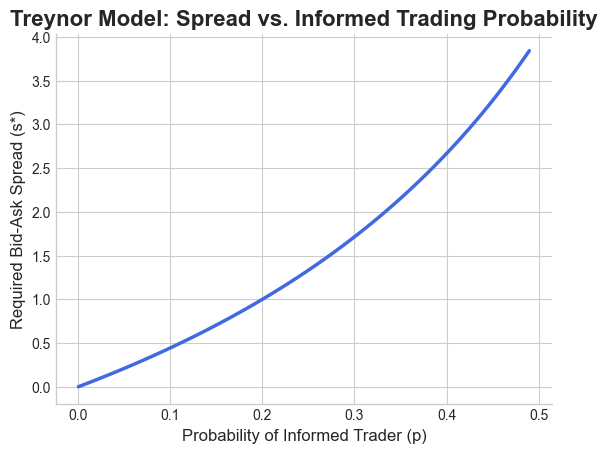

In [43]:
plt.plot(probabilities, spreads, color='royalblue', linewidth=2.5, label="Break-Even Spread (s*)")

plt.title("Treynor Model: Spread vs. Informed Trading Probability", fontsize=16, fontweight='bold')

plt.xlabel("Probability of Informed Trader (p)", fontsize=12)
plt.ylabel("Required Bid-Ask Spread (s*)", fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)